# Part II: Connecting Python to SQL

In [2]:
!pip install mysql-connector-python

# TASK -1:-Write a query to show the quantity of items sold by each department. Sort the results by department name.


In [1]:
import mysql.connector
import pandas as pd


# Connect to your MySQL database
conn = mysql.connector.connect(host='127.0.0.1', database='Terpbuy', user='root', password='PHW#84#jeor')

# Replace the SQL query with the one you want to execute
sql_query = """
    SELECT
        d.department_name,
        SUM(ol.quantity_sold) AS total_items_sold
    FROM
        department d
    JOIN
        product p ON d.department_id = p.department_id
    JOIN
        order_line ol ON p.product_id = ol.product_id
    GROUP BY
        d.department_name
    ORDER BY
        d.department_name;
"""

df = pd.read_sql_query(sql_query, conn)
conn.close()
print(df)

       department_name  total_items_sold
0              Apparel            2336.0
1            Book Shop              12.0
2           Discs Shop             285.0
3             Fan Shop            2406.0
4              Fitness             244.0
5             Footwear             932.0
6                 Golf            2355.0
7   Health and Beauty               64.0
8             Outdoors             812.0
9             Pet Shop              54.0
10          Technology              39.0


C:\Users\dell\AppData\Local\Temp\ipykernel_17740\2982574267.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


# TASK 2:- Using the query you wrote in Question 1, create a data visualization (e.g., a bar chart) showing all departments and the number of items each of them sold. Using a markdown cell, explain what you observe from the analysis.


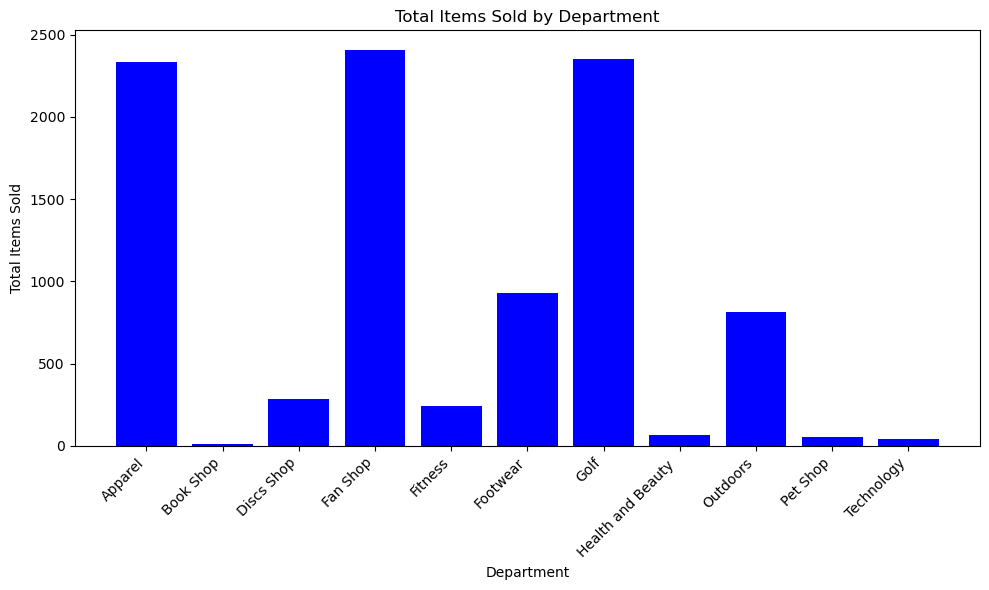

In [2]:
import matplotlib.pyplot as plt
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['department_name'], df['total_items_sold'], color='blue')
plt.xlabel('Department')
plt.ylabel('Total Items Sold')
plt.title('Total Items Sold by Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# TASK 3:- Write a query to show the number of orders placed in each year in which at least one order was placed. Hint: Search online to learn about MySQL’s YEAR() function to query data.


In [3]:
# Connect to your MySQL database
conn = mysql.connector.connect(host='127.0.0.1', database='Terpbuy', user='root', password='PHW#84#jeor')

sql_query = """
    SELECT
        YEAR(order_date) AS Order_Year,
        COUNT(*) AS Total_Orders
    FROM
        orders
    GROUP BY
        Order_Year
    HAVING
        COUNT(*) > 0
    ORDER BY
        Order_Year;
"""

# Execute the SQL query
df = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

# Display the result
print(df)

   Order_Year  Total_Orders
0        2018           585
1        2019           708
2        2020           497
3        2021           362


C:\Users\dell\AppData\Local\Temp\ipykernel_17740\910541005.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


# task 4:- Using the query you wrote in Question 3, create a data visualization (e.g., a line graph) showing all years and the number of orders placed during each year, to see if there is a trend in ordering. Using a markdown cell, explain what you observe from the analysis.


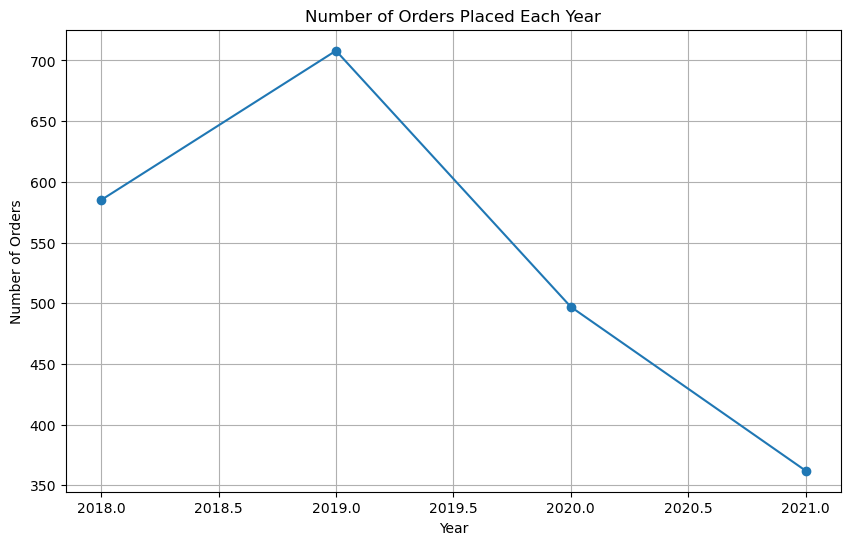

In [4]:
# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(df['Order_Year'], df['Total_Orders'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Placed Each Year')
plt.grid(True)
plt.show()